<a href="https://colab.research.google.com/github/rubyywangg/Machine-Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'].value_counts() #counts how many of each species of flower (50 of each)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
#logistic regression
X = df.drop('species', 1) #set of diff columns (data matrix/feature matrix)
y = df.species #label vector

<ipython-input-8-d99c1079ba7f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('species', 1) #set of diff columns (data matrix/feature matrix)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10) #split into testing data and training data
#click on the {x} to see the results

In [13]:
#logisitc regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=10) #object of LinearRegression (random state is a random way of splitting people starting at the seed 10)

In [14]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [15]:
y_pred = logreg.predict(X_test) #predicts values

In [16]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

In [17]:
print("Accuracy:", metrics.accuracy_score(y_pred,y_test))

Accuracy: 1.0


In [18]:
import plotly
import plotly.express as px

fig = px.scatter_3d(df[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]],
  x = 'sepal_length',
  y='sepal_length',
  z='petal_width',
  size='petal_length',
  color='species',
  opacity=0.7
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [27]:
#k means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
kmeans = KMeans(n_clusters = 3) #specify the number of clsuters as 3
kmeans.fit(X)

KMeans(n_clusters=3)

In [21]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_ #the centroids are the the centers of the optimals clusters

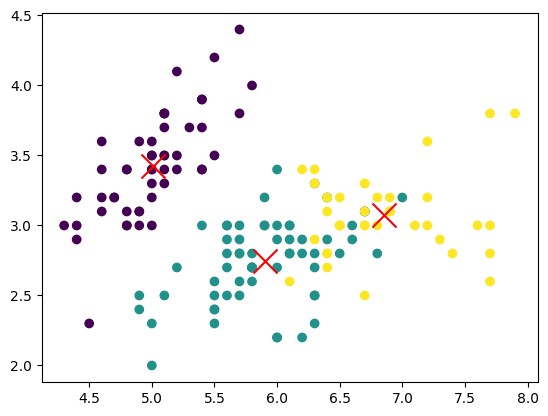

In [26]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap ="viridis")
plt.scatter(centroids[:,0], centroids[:,1], s= 300, c= "red", marker = "x") #the red X marks the centroids
#the machine learning is happening in 4-d, when we plot it 2-d, therefore some info is lost, which is why some green dots are in the yellow clusters etc.